In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import glob

In [2]:
def drop_outlier(array, count, bins):
    """
    移除数组中的异常值。

    参数：
    array : numpy.ndarray
        输入数组，包含需要处理的数据。
    count : int
        数组的总元素数量，用于循环控制。
    bins : int
        每个区间的大小，决定了对数组进行分段的数量。

    返回：
    numpy.ndarray
        经过处理后的数组索引，包含未被视为异常值的元素索引。
    """
    index = []  # 用于存储非异常值的索引
    # 创建区间范围，从 1 到 count，以 bins 为步长
    range_ = np.arange(1, count, bins)
    
    # 遍历每个区间，直到倒数第二个元素
    for i in range_[:-1]:
        array_lim = array[i : i + bins]  # 获取当前区间的数组切片
        sigma = np.std(array_lim)  # 计算当前区间的标准差
        mean = np.mean(array_lim)  # 计算当前区间的均值
        
        # 设定异常值的阈值，分别为均值加减两倍标准差
        th_max, th_min = mean + sigma * 2, mean - sigma * 2
        
        # 找到在阈值范围内的元素索引
        idx = np.where((array_lim < th_max) & (array_lim > th_min))
        idx = idx[0] + i  # 调整索引位置，映射回原始数组
        index.extend(list(idx))  # 将有效索引添加到结果列表中

    return np.array(index)  # 返回有效索引的 NumPy 数组


### 从 xlsx 文件中提取信息

In [ ]:
# # 定义电池名称列表
# Battery_list = ["CS2_35", "CS2_36", "CS2_37", "CS2_38"]

# # 定义数据集路径
# dir_path = "dataset/"
# # 初始化一个字典，用于存储每个电池的结果
# Battery = {}

# # 遍历每个电池名称
# for name in Battery_list:
#     print("Load Dataset " + name + " ...")  # 输出加载信息
#     # 使用 glob 获取符合条件的 Excel 文件路径
#     path = glob.glob(dir_path + name + "/*.xlsx")
#     dates = []  # 初始化存储日期的列表
#     # 遍历每个文件路径
#     for p in path:
#         df = pd.read_excel(p, sheet_name=1)  # 读取 Excel 文件的第二个工作表
#         print("Load " + str(p) + " ...")  # 输出文件加载信息
#         dates.append(df["Date_Time"][0])  # 提取第一行的日期时间并添加到列表

#     # 按日期排序文件路径
#     idx = np.argsort(dates)
#     path_sorted = np.array(path)[idx]  # 按日期排序后的文件路径

#     count = 0  # 计数器，用于统计处理的循环次数
#     # 初始化用于存储各种指标的列表
#     discharge_capacities = []
#     health_indicator = []
#     internal_resistance = []
#     CCCT = []
#     CVCT = []

#     # 遍历排序后的文件路径
#     for p in path_sorted:
#         df = pd.read_excel(p, sheet_name=1)  # 读取 Excel 文件的第二个工作表
#         print("Load " + str(p) + " ...")  # 输出文件加载信息
#         cycles = list(set(df["Cycle_Index"]))  # 获取独特的循环索引

#         # 遍历每个循环
#         for c in cycles:
#             df_lim = df[df["Cycle_Index"] == c]  # 筛选当前循环的数据

#             # 处理充电数据
#             df_c = df_lim[(df_lim["Step_Index"] == 2) | (df_lim["Step_Index"] == 4)]  # 充电步骤
#             c_v = df_c["Voltage(V)"]  # 电压
#             c_c = df_c["Current(A)"]   # 电流
#             c_t = df_c["Test_Time(s)"]  # 测试时间

#             # 处理恒流（CC）和恒压（CV）充电阶段
#             df_cc = df_lim[df_lim["Step_Index"] == 2]  # 恒流充电
#             df_cv = df_lim[df_lim["Step_Index"] == 4]  # 恒压充电
#             # 计算 CCCT（恒流充电时间）
#             CCCT.append(np.max(df_cc["Test_Time(s)"]) - np.min(df_cc["Test_Time(s)"]))
#             # 计算 CVCT（恒压充电时间）
#             CVCT.append(np.max(df_cv["Test_Time(s)"]) - np.min(df_cv["Test_Time(s)"]))

#             # 处理放电数据
#             df_d = df_lim[df_lim["Step_Index"] == 7]  # 放电步骤
#             d_v = df_d["Voltage(V)"]  # 电压
#             d_c = df_d["Current(A)"]   # 电流
#             d_t = df_d["Test_Time(s)"]  # 测试时间
#             d_im = df_d["Internal_Resistance(Ohm)"]  # 内部电阻

#             if len(list(d_c)) != 0:  # 确保放电电流数据不为空
#                 time_diff = np.diff(list(d_t))  # 计算时间差
#                 d_c = np.array(list(d_c))[1:]  # 移除第一个元素的电流
#                 # 计算放电容量，公式为 Q = A * h
#                 discharge_capacity = time_diff * d_c / 3600  # 转换为小时
#                 # 计算每个时刻的累计放电容量
#                 discharge_capacity = [
#                     np.sum(discharge_capacity[:n])
#                     for n in range(discharge_capacity.shape[0])
#                 ]
#                 discharge_capacities.append(-1 * discharge_capacity[-1])  # 添加最终放电容量

#                 # 计算健康指标
#                 dec = np.abs(np.array(d_v) - 3.8)[1:]  # 与电压3.8V的差值
#                 start = np.array(discharge_capacity)[np.argmin(dec)]  # 找到开始放电的位置
#                 dec = np.abs(np.array(d_v) - 3.4)[1:]  # 与电压3.4V的差值
#                 end = np.array(discharge_capacity)[np.argmin(dec)]  # 找到结束放电的位置
#                 health_indicator.append(-1 * (end - start))  # 添加健康指标

#                 # 计算平均内部电阻
#                 internal_resistance.append(np.mean(np.array(d_im)))
#                 count += 1  # 增加循环计数

#     # 转换结果为 NumPy 数组
#     discharge_capacities = np.array(discharge_capacities)
#     health_indicator = np.array(health_indicator)
#     internal_resistance = np.array(internal_resistance)
#     CCCT = np.array(CCCT)
#     CVCT = np.array(CVCT)

#     # 去除异常值
#     idx = drop_outlier(discharge_capacities, count, 40)
#     # 创建结果 DataFrame
#     df_result = pd.DataFrame(
#         {
#             "cycle": np.linspace(1, idx.shape[0], idx.shape[0]),  # 循环编号
#             "capacity": discharge_capacities[idx],  # 放电容量
#             "SoH": health_indicator[idx],  # 健康状态
#             "resistance": internal_resistance[idx],  # 内部电阻
#             "CCCT": CCCT[idx],  # 恒流充电时间
#             "CVCT": CVCT[idx],  # 恒压充电时间
#         }
#     )
#     # 将结果存储到字典中
#     Battery[name] = df_result

### 如果上面的读取数据集失败，可以通过下面的方式加载已提取出来的数据

In [4]:
Battery_list = ['CS2_35', 'CS2_36', 'CS2_37', 'CS2_38']
Battery = np.load('dataset/CALCE.npy', allow_pickle=True)
Battery = Battery.item()

### 放电容量 v.s. 放电周期

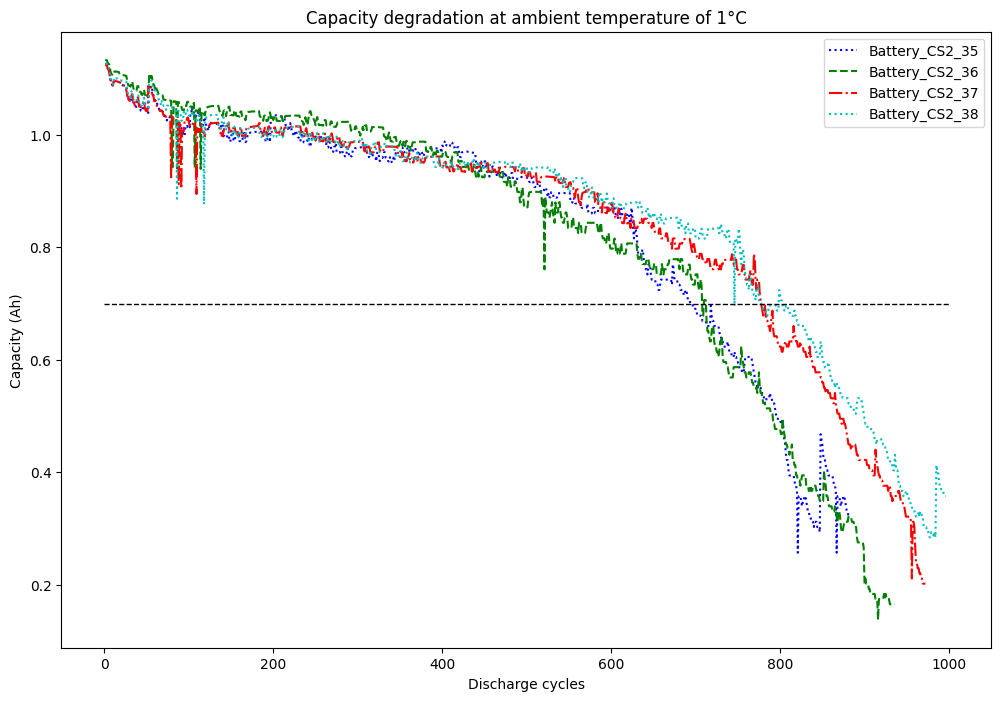

In [5]:
# Rated_Capacity = 1.1  # 定义电池的额定容量，当前代码中未使用

# 创建一个图表和子图，图大小为 12x8 英寸
fig, ax = plt.subplots(1, figsize=(12, 8))

# 定义颜色和线型列表，用于绘制不同电池的曲线
color_list = ["b:", "g--", "r-.", "c:"]

# 遍历电池列表和颜色列表，同时获取电池名称和对应颜色
for name, color in zip(Battery_list, color_list):
    battery = Battery[name]  # 获取当前电池的数据
    # 绘制电池的循环次数与容量关系曲线，设置颜色和标签
    ax.plot(battery["cycle"], battery["capacity"], color, label="Battery_" + name)

# 绘制一条横线表示容量的临界值（0.7 Ah）
plt.plot([-1, 1000], [0.7, 0.7], c="black", lw=1, ls="--")  # 临界点直线

# 设置 x 轴标签、y 轴标签和图表标题
ax.set(
    xlabel="Discharge cycles",  # x 轴标签：放电循环次数
    ylabel="Capacity (Ah)",  # y 轴标签：容量（安时）
    title="Capacity degradation at ambient temperature of 1°C",  # 图表标题
)

# 显示图例，以区分不同电池曲线
plt.legend()

这张图展示了在1°C环境温度下，四种不同电池（Battery_CS2_35、Battery_CS2_36、Battery_CS2_37和Battery_CS2_38）在放电循环过程中的容量退化情况。以下是对这张图的解读：

1. **初始容量**：所有电池在开始时的容量接近1 Ah，表明它们在出厂时的性能是一致的。

2. **退化趋势**：随着放电循环次数的增加，所有电池的容量逐渐下降。这一趋势清楚地显示了电池在使用过程中的退化情况。

3. **各电池的表现**：
   - **Battery_CS2_35**（蓝色虚线）和**Battery_CS2_36**（绿色虚线）的容量下降速度相对较慢，表现出较好的耐用性。
   - **Battery_CS2_37**（红色虚线）和**Battery_CS2_38**（青色虚线）的容量下降速度更快，显示出它们在循环使用中的耐用性相对较差。

4. **稳定性**：在某些循环阶段，电池容量出现明显的波动，这可能与测试条件或电池本身的特性有关。

5. **循环次数与容量**：到达1000个循环时，所有电池的容量普遍下降至0.4 Ah以下，反映出在长时间使用后的显著退化。

6. **大致趋势**：尽管不同电池型号的退化速率有所不同，但整体上，电池的性能会随着使用循环的增加而逐渐减弱。

这张图表明，选择适合特定应用需求的电池型号是至关重要的，因其性能稳定性和耐用性可以显著影响应用的长期效果。**Battery_CS2_35**和**Battery_CS2_36**表现出较好的耐用性。

### 放电容量和内阻变化

Text(0, 0.5, 'State of Health')

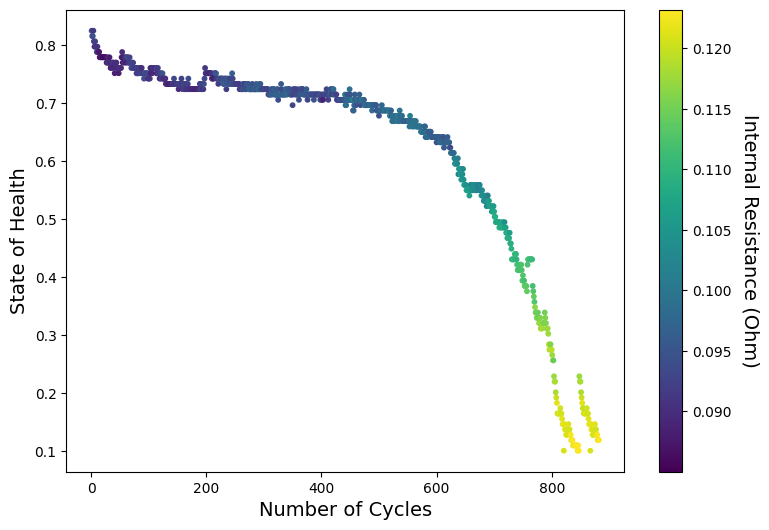

In [ ]:
# 获取电池数据，这里选择名为 "CS2_35" 的电池
battery = Battery["CS2_35"]

# 创建一个新的图形，大小为 9x6 英寸
plt.figure(figsize=(9, 6))

# 绘制散点图，x 轴为放电循环次数，y 轴为健康状态（SoH），点的颜色由内阻决定，点的大小为 10
plt.scatter(battery["cycle"], battery["SoH"], c=battery["resistance"], s=10)

# 添加颜色条（colorbar），用于显示不同颜色代表的内阻值
cbar = plt.colorbar()
# 设置颜色条的标签，表示为“内阻（Ohm）”
cbar.set_label("Internal Resistance (Ohm)", fontsize=14, rotation=-90, labelpad=20)

# 设置 x 轴标签为“循环次数”，字体大小为 14
plt.xlabel("Number of Cycles", fontsize=14)

# 设置 y 轴标签为“健康状态”，字体大小为 14
plt.ylabel("State of Health", fontsize=14)

从这张散点图中，我们可以观察到关于“CS2_35”电池的健康状态（SoH）随放电循环次数的变化情况。以下是对图形的详细解读：

1. **健康状态（SoH）与循环次数的关系**：
   - 健康状态在放电循环的初期（约0到200个循环）保持相对稳定，数值约在0.7到0.8之间。
   - 随着循环次数的增加（超过200个循环），SoH值逐渐下降，这表明电池的性能正在退化。

2. **退化趋势**：
   - 当循环次数接近800时，SoH显著下降至0.2以下。这表明电池在经历了大量的充放电循环后，其性能已大幅削弱。

3. **内阻与颜色编码**：
   - 点的颜色根据内阻的不同而变化，内阻值范围在0.090到0.120 Ohm之间。
   - 从图中可以看出，内阻随着循环次数的增加而逐渐增加，尤其在后期（循环次数高于600时），这种变化尤为明显。

4. **总结**：
   - 图表展示了电池在使用过程中性能与内阻之间的关系，随着时间的推移，电池的健康状态明显降低，同时内阻增加，这通常意味着电池效率下降和能量损失增大。

### 各项指标 v.s. 充放电周期

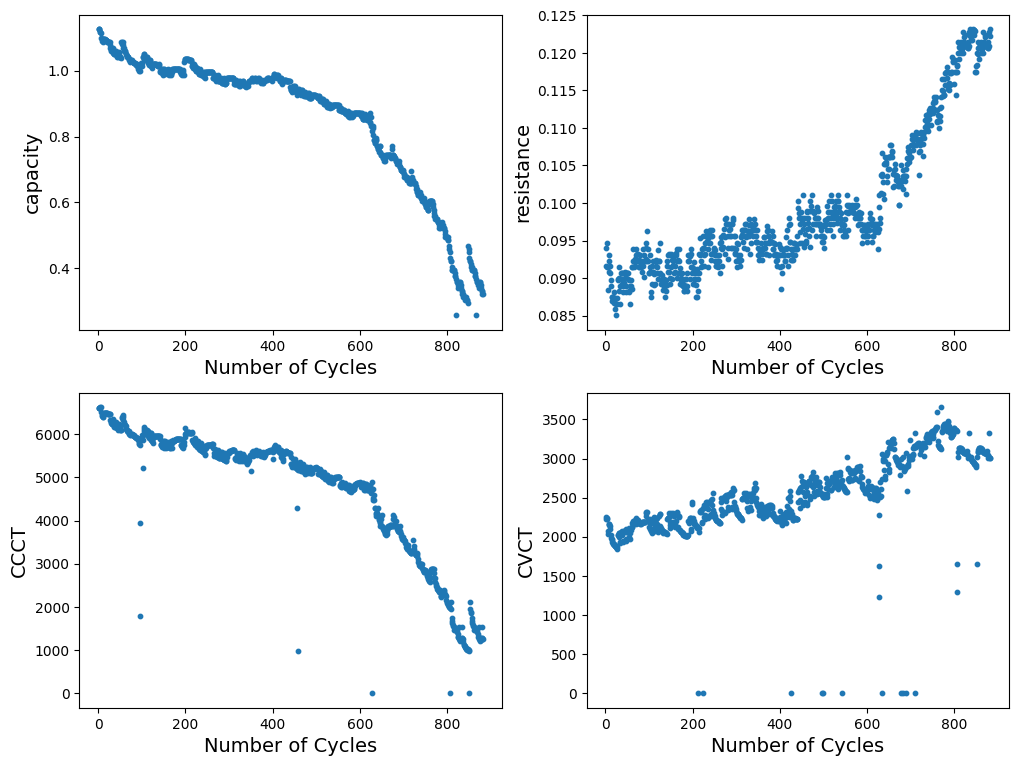

In [7]:
# 提取电池 "CS2_35" 的数据
battery = Battery["CS2_35"]

# 设置图形大小为 12x9 英寸
plt.figure(figsize=(12, 9))

# 定义需要可视化的性能指标名称
names = ["capacity", "resistance", "CCCT", "CVCT"]

# 循环遍历每个性能指标
for i in range(4):
    # 创建子图，布局为 2x2，i+1 表示当前子图的位置
    plt.subplot(2, 2, i + 1)
    # 绘制散点图，横轴为循环次数，纵轴为当前性能指标
    plt.scatter(battery["cycle"], battery[names[i]], s=10)
    # 设置横坐标标签为 "Number of Cycles"，字体大小为 14
    plt.xlabel("Number of Cycles", fontsize=14)
    # 设置纵坐标标签为当前性能指标名称，字体大小为 14
    plt.ylabel(names[i], fontsize=14)

从这组图表中，我们可以对“CS2_35”电池的性能指标进行详细分析。以下是对四个性能指标的解读：

1. **容量 (Capacity)**：
   - 纵轴显示容量随放电循环次数的变化。
   - 随着循环次数的增加，容量逐渐下降，尤其在600个循环后，容量的下降速度加快，最终降至约0.4 Ah，显示出电池在使用过程中的显著性能退化。

2. **内阻 (Resistance)**：
   - 纵轴显示内阻变化情况。
   - 随着循环次数的增加，内阻呈现出明显上升的趋势，从约0.085 Ohm增加到接近0.125 Ohm。这表明电池在使用过程中，内阻增大可能导致效率降低和能量损耗增加。

3. **CCCT (Cycle Count Capacity Test)**：
   - 纵轴显示CCCT的变化。
   - 随着放电循环的增加，CCCT数据整体呈下降趋势，显示出电池在持续使用过程中的容量损失情况。特别是在600个循环后，CCCT的值显著下跌，反映了电池的性能快速衰退。

4. **CVCT (Cycle Voltage Capacity Test)**：
   - 纵轴显示CVCT的变化。
   - CVCT的值在放电循环后期（600个循环之后）出现明显上升，说明电池在经过长时间的使用后，可能出现电压特性变化，这可能与其内部化学反应和结构变化有关。

### 总结：

这些散点图提供了关于“CS2_35”电池在不同性能指标上的趋势分析，清晰地展示了电池在使用过程中的性能衰退及相应的内阻变化。这些信息对于评估电池的使用寿命和性能优化具有重要意义。通过了解这些趋势，能更好地制定电池使用和维护策略。